In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, ggrepel, patchwork,
cowplot, ComplexHeatmap, factoextra, FactoMineR, VIM, missMDA) 

# Functions

In [350]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Plotting_functions.R")

# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [7]:
pbmc_hla_v_j_gliph <- readr::read_rds(paste0(datapath, "/int_pbmc_hla_v_j_gliph.rds"))

In [8]:
cfdna_hla_v_j_gliph <- readr::read_rds(paste0(datapath, "/int_cfdna_hla_v_j_gliph.rds"))

In [9]:
rownames(pbmc_hla_v_j_gliph) <- pbmc_hla_v_j_gliph$sample_id

In [10]:
dim(pbmc_hla_v_j_gliph)

[1]  534 8829

In [11]:
table(pbmc_hla_v_j_gliph$Relapse)


  0   1 
431 103 

In [12]:
head(pbmc_hla_v_j_gliph)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TDT,SG%GE,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0


In [13]:
pbmc_hla_v_j_gliph$cfShannon <- cfdna_hla_v_j_gliph$observed_Shannon[match(pbmc_hla_v_j_gliph$sample_id, cfdna_hla_v_j_gliph$sample_id)]

In [14]:
head(pbmc_hla_v_j_gliph)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,SG%GE,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,0,0,0,0,0,0,0,0,0,NA
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,43.423
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,8.671
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,1.775
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,NA
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,3.065


PCA

In [15]:
cols_flow <- c('ATC', 'Naïve%','SCM%','CM%','EM%','TE%','PD1%','LAG3%','TIM3%')
cols_others <- c("observed_Shannon", "cfShannon")

In [16]:
pbmc_hla_v_j_gliph$cyclenum <- as.numeric(gsub("X0", "", pbmc_hla_v_j_gliph$cycle))

In [17]:
mymat <- pbmc_hla_v_j_gliph[, c(cols_flow, cols_others)]

In [18]:
rownames(mymat) <- pbmc_hla_v_j_gliph[["sample_id"]]
# remove rows with all NAs
mymat <- mymat[rowSums(is.na(mymat)) != ncol(mymat), ]
# rmeove those with only 0s and NAs
mymat <- mymat[rowSums(mymat, na.rm = TRUE) != 0, ]

In [19]:
pbmc_hla_v_j_gliph <- pbmc_hla_v_j_gliph[rownames(mymat), ]

In [20]:
mymat_narm <- mymat[rowSums(is.na(mymat)) == 0, ]

In [21]:
# myvars <- sort(Rfast::colVars(mymat_narm), decreasing = TRUE)
# mymat_narm <- mymat_narm[, names(myvars)[myvars > 0]]

In [22]:
df_narm <- pbmc_hla_v_j_gliph[rownames(mymat_narm), ]

In [23]:
head(df_narm)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,0,2.878,2
CHP_343_04,CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,0,0,0,0,1.000,4
CHP_343_05,CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,0,0,0,0,1.890,5
CHP_347_02,CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,0,0,0,0,0,0,0,0,4.413,2
CHP_347_03,CHP_347_03,CHP_347,X03,37.6,768.80,13,ALL,37.6,2379,27,...,0,0,0,0,0,0,0,0,2.956,3
CHP_347_04,CHP_347_04,CHP_347,X04,0.8,1542.25,13,ALL,0.8,745,14,...,0,0,0,0,0,0,0,0,3.470,4


In [24]:
dim(df_narm)

[1]   78 8831

In [25]:
head(mymat_narm)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,459.04,0.000000,6.6079295,23.436123,1.409692,68.546256,12.158590,33.127753,12.158590,21.422,2.878
CHP_343_04,536.63,1.531394,1.3016845,46.554364,5.589587,45.022971,45.022971,16.768760,45.022971,28.222,1.000
CHP_343_05,371.20,1.231527,0.7389163,27.052545,6.239737,64.737274,20.402299,26.929392,20.402299,26.774,1.890
CHP_347_02,1038.59,8.629989,76.5911543,8.090615,1.618123,5.070119,5.393743,7.227616,5.393743,280.285,4.413
CHP_347_03,768.80,39.428331,3.8671711,39.890710,1.134931,15.678857,35.729298,33.669609,35.729298,69.369,2.956
CHP_347_04,1542.25,22.684564,4.6979866,64.563758,1.879195,6.174497,60.000000,60.805369,60.000000,70.466,3.470


In [26]:
# # Get median of mymat_narm columns for each cancergroup using df_narm
# medians <- apply(mymat_narm, 2, function(x) tapply(x, df_narm$cancergroup, median, na.rm = TRUE))
# mads <- apply(mymat_narm, 2, function(x) tapply(x, df_narm$cancergroup, mad, na.rm = TRUE))

In [27]:
head(mymat_narm)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,459.04,0.000000,6.6079295,23.436123,1.409692,68.546256,12.158590,33.127753,12.158590,21.422,2.878
CHP_343_04,536.63,1.531394,1.3016845,46.554364,5.589587,45.022971,45.022971,16.768760,45.022971,28.222,1.000
CHP_343_05,371.20,1.231527,0.7389163,27.052545,6.239737,64.737274,20.402299,26.929392,20.402299,26.774,1.890
CHP_347_02,1038.59,8.629989,76.5911543,8.090615,1.618123,5.070119,5.393743,7.227616,5.393743,280.285,4.413
CHP_347_03,768.80,39.428331,3.8671711,39.890710,1.134931,15.678857,35.729298,33.669609,35.729298,69.369,2.956
CHP_347_04,1542.25,22.684564,4.6979866,64.563758,1.879195,6.174497,60.000000,60.805369,60.000000,70.466,3.470


In [28]:
head(df_narm)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,0,2.878,2
CHP_343_04,CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,0,0,0,0,1.000,4
CHP_343_05,CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,0,0,0,0,1.890,5
CHP_347_02,CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,0,0,0,0,0,0,0,0,4.413,2
CHP_347_03,CHP_347_03,CHP_347,X03,37.6,768.80,13,ALL,37.6,2379,27,...,0,0,0,0,0,0,0,0,2.956,3
CHP_347_04,CHP_347_04,CHP_347,X04,0.8,1542.25,13,ALL,0.8,745,14,...,0,0,0,0,0,0,0,0,3.470,4


In [29]:
# scale each column by the median of the cancergroup in medians
# mymat_narm_scaled <- mymat_narm
# for(i in 1:nrow(mymat_narm)){
#   mymat_narm_scaled[i, ] <- mymat_narm[i, ]/medians[df_narm$cancergroup[i], ]#/ mads[df_narm$cancergroup[i], ]
# }

In [30]:
colnames(mymat_narm)[colnames(mymat_narm) == "observed_Shannon"] <- "cfTCR Shannon"
colnames(mymat_narm)[colnames(mymat_narm) == "cfShannon"] <- "cfDNA Shannon"

In [31]:
set.seed(123)
pca <- prcomp(mymat_narm, center = T, scale. = T)

In [32]:
p1 <- fviz_pca_ind(pca,
     col.ind = as.vector(df_narm$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE, mean.point = FALSE
)

In [33]:
# flip the first PC
# pca$rotation[,1] <- -pca$rotation[,1]

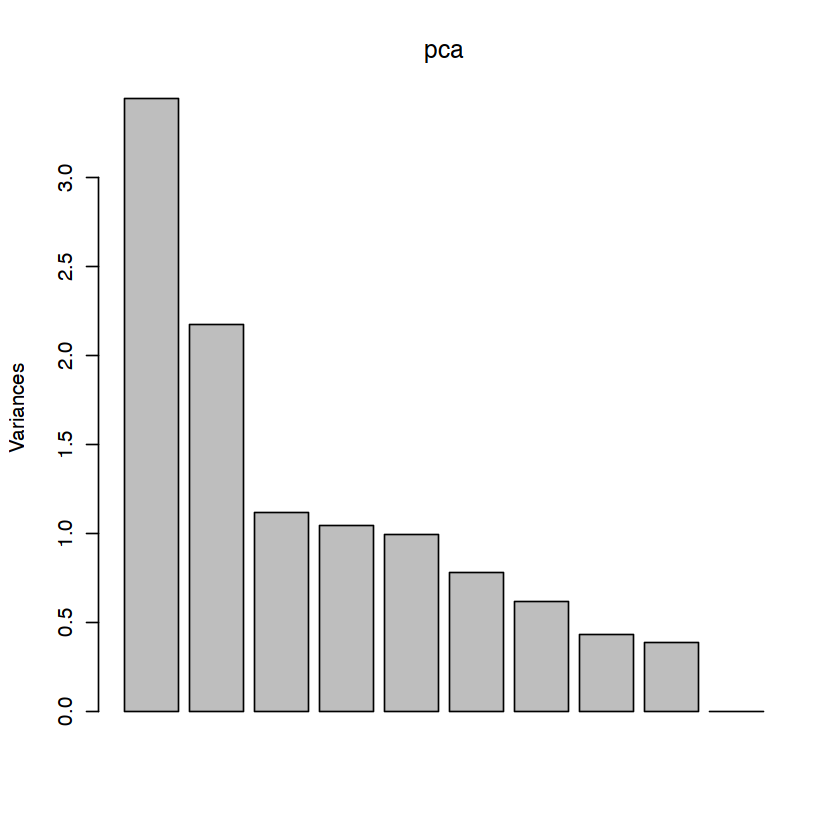

In [34]:
screeplot(pca)

varplot

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


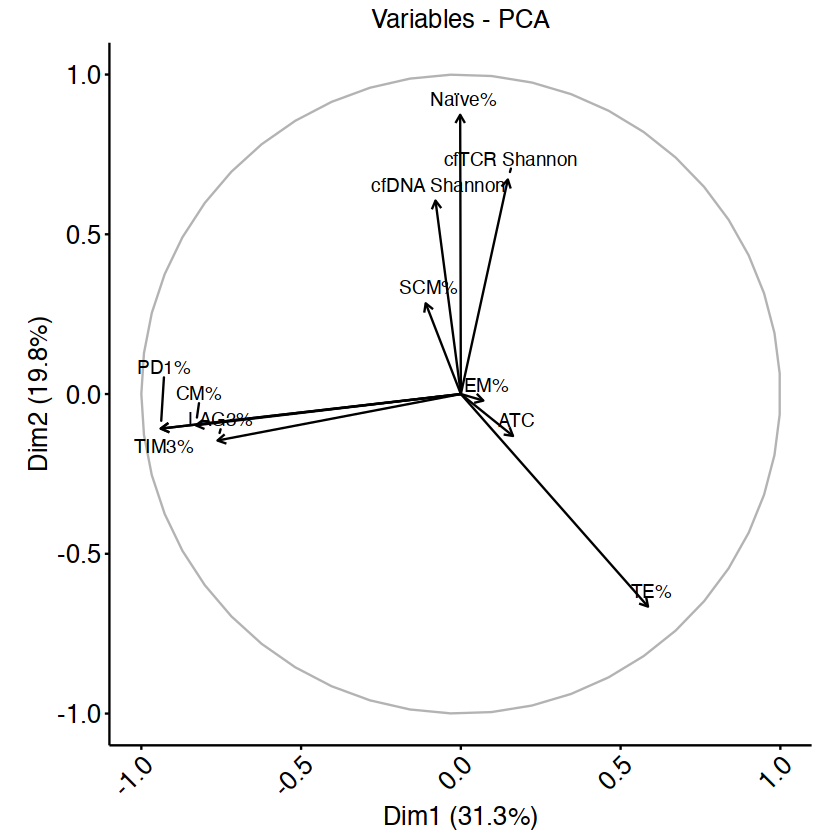

In [35]:
p2 <- fviz_pca_var(pca, repel = F, geom = "arrow", axes.linetype = NA) +
    geom_text_repel(aes(label = rownames(pca$rotation)),
        point.padding = unit(0.5, "lines"),
        min.segment.length = unit(0, "lines"),
        nudge_x = 0.01, nudge_y = 0.01,
        direction = "y"
    ) + myaxis + myplot

p2


In [36]:
pdf(paste0(plotpath, "PCAvarplot.pdf"), width = 7, height = 7)
p2
dev.off()


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


pdf 
  2

biplot

In [37]:
head(df_narm)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,0,2.878,2
CHP_343_04,CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,0,0,0,0,1.000,4
CHP_343_05,CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,0,0,0,0,1.890,5
CHP_347_02,CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,0,0,0,0,0,0,0,0,4.413,2
CHP_347_03,CHP_347_03,CHP_347,X03,37.6,768.80,13,ALL,37.6,2379,27,...,0,0,0,0,0,0,0,0,2.956,3
CHP_347_04,CHP_347_04,CHP_347,X04,0.8,1542.25,13,ALL,0.8,745,14,...,0,0,0,0,0,0,0,0,3.470,4


In [38]:
df_narm$prepost <- NA
df_narm$prepost[ df_narm$cycle == "X01"] <- "Pre-therapy"
df_narm$prepost[ df_narm$cycle != "X01"] <- "Post-therapy"

In [39]:
table(df_narm$prepost)


Post-therapy  Pre-therapy 
          55           23 

In [40]:
# pca <- PCA(mymat_narm)

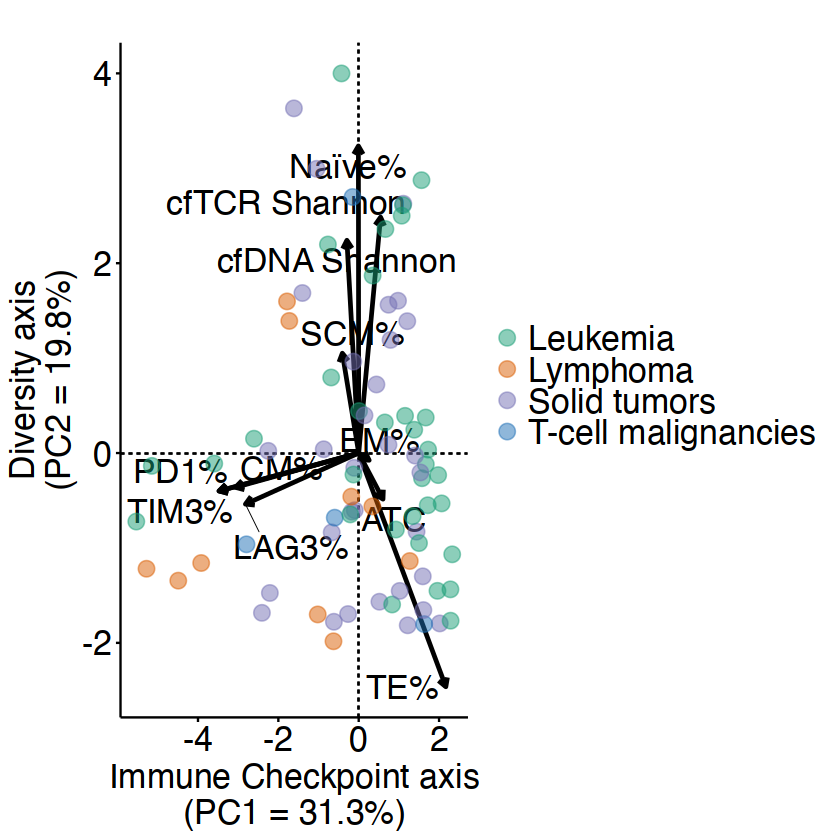

In [41]:
p3 <- fviz_pca_biplot(pca,
    geom.var = c("arrow", "text"),
    geom.ind = "point",
    alpha.ind = 0, alpha.var = 1,
    # col.ind = df_narm$cancergroup,
    # shape.ind = df_narm$prepost,
    col.var = "black",
    repel = TRUE,
    labelsize = 7,
    arrowsize = 1,
    addEllipses = FALSE, 
    mean.point = FALSE,
    title = "") +
    geom_point(aes(colour = df_narm$cancergroup), size = 4, alpha = 0.5) +
    scale_color_manual(values = group_col) + myplot + myaxis +
    theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size = 20), 
    axis.text.y = element_text(size = 20),
    axis.title = element_text(size = 20)) 
# increase size of the legends
p3 <- p3 + theme(legend.text = element_text(size = 20), legend.title = element_blank())
p3 <- p3 + labs(x = "Immune Checkpoint axis\n(PC1 = 31.3%)", y = "Diversity axis\n(PC2 = 19.8%)")

p3


In [42]:
pdf(paste0(plotpath, "PCAbiplot.pdf"), width = 7, height = 7)
p3 + theme(legend.position = "none")
dev.off()

pdf 
  2

In [43]:
pdf(paste0(plotpath, "PCAbiplot_lgd.pdf"), width = 5, height = 5)
grid.draw(get_legend(p3)) 
dev.off()

pdf 
  2

In [44]:
df_narm$Dim1 <- pca$x[,1][match( df_narm$sample_id, rownames(pca$x))]
df_narm$Dim2 <- pca$x[,2][match( df_narm$sample_id, rownames(pca$x))]

In [45]:
table(df_narm$Patient[df_narm$Relapse == 1])


CHP_349 CHP_353 CHP_356 CHP_364 CHP_368 CHP_390 CHP_411 CHP_413 CHP_418 
      1       2       2       2       1       1       1       2       1 

In [46]:
mydist <- as.matrix(dist(pca$x[,1:2])) 

In [47]:
# order df_narm
df_narm <- df_narm %>%
    group_by(Patient) %>%
    # order cyclenum
    arrange(cyclenum) %>%
    ungroup()
pts <- names(which(table(df_narm$Patient) > 1))

In [48]:
dim(df_narm)

[1]   78 8834

In [49]:
df_narm$Dim1 <- pca$x[,1][match( df_narm$sample_id, rownames(pca$x))]
df_narm$Dim2 <- pca$x[,2][match( df_narm$sample_id, rownames(pca$x))]

In [50]:
df_narm$dist <- NA
df_narm$quantreg <- NA

In [51]:
for (i in pts) {
    tmp <- df_narm[df_narm$Patient == i, ]

# quantreg
tmp <- tmp %>% mutate(quantreg_n = quantreg::rq(Dim2 ~ Dim1, tau = 0.5)$coef[2] / n())
# tmp <- tmp %>% mutate(quantreg_n1 = quantreg::rq(Dim1 ~ cyclenum, tau = 0.5)$coef[2] / n())
# tmp <- tmp %>% mutate(quantreg_n2 = quantreg::rq(Dim2 ~ cyclenum, tau = 0.5)$coef[2] / n())
    # distances
    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    df_narm$dist[df_narm$Patient == i] <- tmp$dist
    df_narm$quantreg[df_narm$Patient == i] <- tmp$quantreg_n

}


In [52]:
head(df_narm)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%YE,%G,%E,cfShannon,cyclenum,prepost,Dim1,Dim2,dist,quantreg
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,2.874,1,Pre-therapy,0.7413361,0.08700802,NA,0.41014023
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,1.890,1,Pre-therapy,1.9604253,-1.45183248,NA,NA
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,0,0,4.170,1,Pre-therapy,1.7184050,-0.55029920,NA,-1.38092546
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,0,0,6.906,1,Pre-therapy,0.6513519,0.32219737,NA,0.01577622
CHP_361_01,CHP_361,X01,2.4,516.04,13,HD,2.4,2317,94,...,0,0,0,44.753,1,Pre-therapy,-1.7842084,1.59745583,NA,0.26847373
CHP_362_01,CHP_362,X01,10.2,1072.50,16,OS,10.2,2489,115,...,0,0,0,5.650,1,Pre-therapy,-0.1113740,-0.15583482,NA,-0.02783916


In [53]:
allpts <- as.data.frame(table(df_narm$Patient), stringsAsFactors = F)
df_narm$dist[df_narm$dist == 0] <- NA

allpts$sumdist <- NA
allpts$meddist <- NA
allpts$samplecount <- NA

for (i in 1:nrow(allpts)) {
    tmp <- as.data.frame(df_narm[df_narm$Patient == allpts$Var1[i], ])
    allpts$sumdist[i] <- sum(tmp[tmp$dist != 0, "dist"], na.rm = T)
    allpts$meddist[i] <- median(tmp[tmp$dist != 0, "dist"], na.rm = T)
    # count number of samples for meddist
    allpts$samplecount[i] <- nrow(tmp[!is.na(tmp$dist), ]) + 1 # add 1 for the first sample, this is the number of samples with a distance
}

allpts$sumdist_n <- allpts$sumdist / allpts$samplecount
allpts$meddist_n <- allpts$meddist / allpts$samplecount
allpts_no0 <- allpts[allpts$sumdist_n > 0, ]
allpts_no0 <- allpts_no0[allpts_no0$Freq > 1, ]

mysample_df <- df_narm[df_narm$Patient %in% allpts_no0$Var1, ]
mypatients <- mysample_df[!duplicated(mysample_df$Patient), ]
mypatients$meddist_n <- allpts_no0$meddist_n[match(mypatients$Patient, allpts_no0$Var1)]
mypatients$meddist <- allpts_no0$meddist[match(mypatients$Patient, allpts_no0$Var1)]


In [54]:
df_narm$meddist_n <- mypatients$meddist_n[match(df_narm$Patient, mypatients$Patient)]

In [55]:
summary(mypatients$meddist_n)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5152  0.5434  0.8542  0.9251  0.9456  1.9622 

In [56]:
mypatients[ order(mypatients$meddist_n), ]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%E,cfShannon,cyclenum,prepost,Dim1,Dim2,dist,quantreg,meddist_n,meddist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_350_02,CHP_350,X02,39.5,0.00,1,HB,39.5,2368,26,...,0,6.998,2,Post-therapy,1.1104367,2.62646257,NA,3.881397001,0.5152113,1.030423
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,6.906,1,Pre-therapy,0.6513519,0.32219737,NA,0.015776224,0.5205460,2.602730
CHP_413_01,CHP_413,X01,4.0,0.00,19,AML,4.0,1985,43,...,0,3.981,1,Pre-therapy,0.8317676,-1.59575953,NA,0.912002503,0.5306924,1.061385
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,2.874,1,Pre-therapy,0.7413361,0.08700802,NA,0.410140228,0.5434345,1.086869
CHP_362_01,CHP_362,X01,10.2,1072.50,16,OS,10.2,2489,115,...,0,5.650,1,Pre-therapy,-0.1113740,-0.15583482,NA,-0.027839162,0.5595812,1.119162
CHP_408_01,CHP_408,X01,5.1,338.80,5,OS,5.1,2140,338,...,0,1.936,1,Pre-therapy,0.1444239,0.39672092,NA,-0.725872427,0.6726805,2.018042
CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,0,4.413,2,Post-therapy,0.3469361,1.86960641,NA,0.074521132,0.8542161,3.416864
CHP_361_01,CHP_361,X01,2.4,516.04,13,HD,2.4,2317,94,...,0,44.753,1,Pre-therapy,-1.7842084,1.59745583,NA,0.268473732,0.8817865,2.645359
CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,2.878,2,Post-therapy,-0.2655955,-1.69641240,NA,-0.002006542,0.8969476,1.793895


In [57]:
table(mypatients$Relapse)


 0  1 
12  1 

In [58]:
table(df_narm$Patient)


CHP_343 CHP_347 CHP_348 CHP_349 CHP_350 CHP_351 CHP_353 CHP_356 CHP_357 CHP_358 
      3       4       2       1       2       1       2       2       5       1 
CHP_361 CHP_362 CHP_363 CHP_364 CHP_368 CHP_370 CHP_371 CHP_372 CHP_373 CHP_375 
      3       3       1       2       1       1       1       1       1       1 
CHP_378 CHP_381 CHP_383 CHP_385 CHP_387 CHP_390 CHP_391 CHP_393 CHP_394 CHP_396 
      2       1       2       1       2       1       1       1       1       2 
CHP_397 CHP_398 CHP_399 CHP_400 CHP_403 CHP_404 CHP_405 CHP_407 CHP_408 CHP_409 
      2       1       3       1       1       1       3       2       3       1 
CHP_410 CHP_411 CHP_413 CHP_414 CHP_415 CHP_418 CHP_419 
      1       1       2       1       1       1       1 

In [59]:
# get median meddist_n for each disease_type
medians <- tapply(mypatients$meddist_n, mypatients$Disease_type, median, na.rm = T)

In [60]:
mypatients_order <- mypatients
mypatients_order$Disease_type <- factor(mypatients_order$Disease_type, levels = names(sort(medians)))

In [61]:
# botplot and point plot using ggplot2 y axis is meddist_n, x axis is Disease_type
p4 <- ggplot(data = mypatients_order, aes(x = Disease_type, y = meddist_n)) +
    
    geom_point( size = 3, alpha = 0.5) +
    myplot + myaxis 

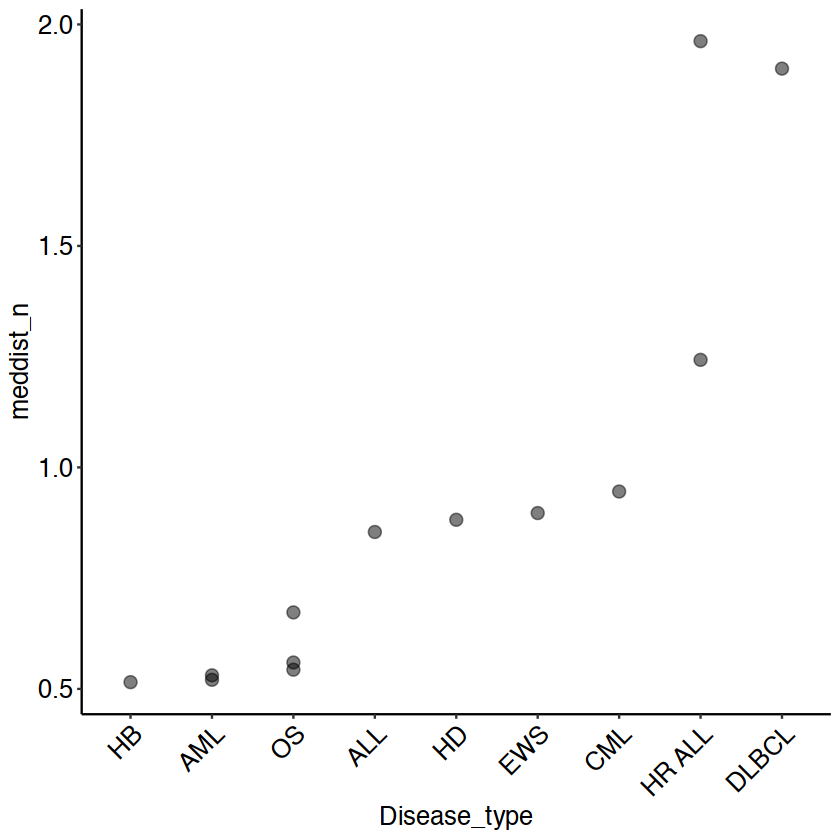

In [62]:
p4

In [63]:
for (i in mypatients$Patient[ mypatients$Relapse == 1]) {
    df_narm$alpha <- NA
    df_narm$alpha[df_narm$Patient == i] <- 1
    df_narm$alpha[df_narm$Patient != i] <- 0.4
    pdf(paste0(plotpath, "PCAplot_", i, "relapsed.pdf"))
    print(dimplot_pt(df_narm, i, "cancergroup", "alpha") +
        ggtitle(paste0(
            i, " Relapsed ", mypatients$Disease_type[mypatients$Patient == i], "\n",
            "Score: ", mypatients$meddist_n[mypatients$Patient == i]
        )))
    dev.off()
}


In [64]:
for (i in mypatients$Patient[ mypatients$Relapse == 0]) {
    df_narm$alpha <- NA
    df_narm$alpha[df_narm$Patient == i] <- 1
    df_narm$alpha[df_narm$Patient != i] <- 0.4
    pdf(paste0(plotpath, "PCAplot_", i, "Norelapse.pdf"))
    print(dimplot_pt(df_narm, i, "cancergroup", "alpha") +
        ggtitle(paste0(
            i, "No Relapse ", mypatients$Disease_type[mypatients$Patient == i], "\n",
            "Score: ", mypatients$meddist_n[mypatients$Patient == i]
        )))
    dev.off()
}


In [65]:
as.data.frame.matrix(table(df_narm$Patient, df_narm$Relapse))

,0,1
,<int>,<int>
CHP_343,3,0
CHP_347,4,0
CHP_348,2,0
CHP_349,0,1
CHP_350,2,0
CHP_351,1,0
CHP_353,0,2
CHP_356,0,2
CHP_357,5,0


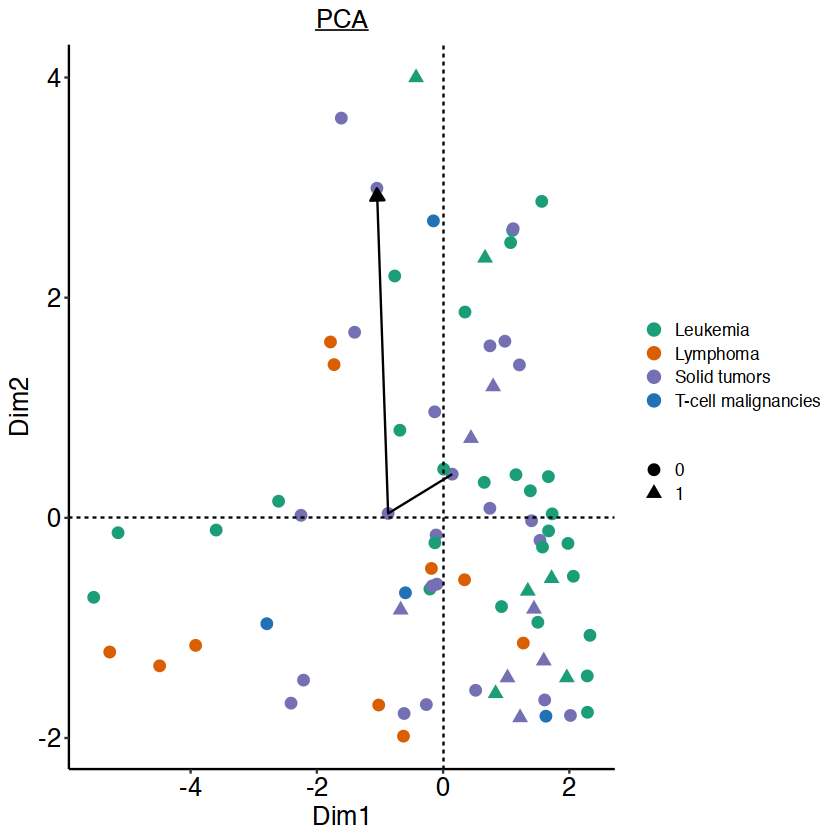

In [66]:
ggplot(data = df_narm, aes(x = Dim1, y = Dim2, shape = as.factor(Relapse))) +
    geom_point(aes(color = cancergroup), alpha = 1, size = 3) +
    # geom_text(data = df_narm[df_narm$Patient %in% c( "CHP_418"),], aes(label = Patient), size = 3, nudge_x = 0.1, nudge_y = 0.1) +
    geom_path(
        data = df_narm[df_narm$Patient %in% c("CHP_408"), ], aes(group = Patient), # color = c("red", "black"),
        arrow = arrow(length = unit(0.30, "cm"), ends = "last", type = "closed")
    ) +
    myplot +
    myaxis +
    theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
    scale_color_manual(values = group_col) +
    geom_hline(yintercept = 0, linetype = "dashed") +
    geom_vline(xintercept = 0, linetype = "dashed") +
    ggtitle(expression(underline("PCA")))


Score Dims, generate spiderplots

In [67]:
head(df_narm)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%E,cfShannon,cyclenum,prepost,Dim1,Dim2,dist,quantreg,meddist_n,alpha
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,2.874,1,Pre-therapy,0.7413361,0.08700802,NA,0.41014023,0.5434345,0.4
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,1.890,1,Pre-therapy,1.9604253,-1.45183248,NA,NA,NA,0.4
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,4.170,1,Pre-therapy,1.7184050,-0.55029920,NA,-1.38092546,NA,0.4
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,6.906,1,Pre-therapy,0.6513519,0.32219737,NA,0.01577622,0.5205460,0.4
CHP_361_01,CHP_361,X01,2.4,516.04,13,HD,2.4,2317,94,...,0,44.753,1,Pre-therapy,-1.7842084,1.59745583,NA,0.26847373,0.8817865,0.4
CHP_362_01,CHP_362,X01,10.2,1072.50,16,OS,10.2,2489,115,...,0,5.650,1,Pre-therapy,-0.1113740,-0.15583482,NA,-0.02783916,0.5595812,0.4


In [68]:
round(pca$rotation[,1],3)
round(pca$rotation[,2],3)

ATC        Naïve%          SCM%           CM%           EM% 
        0.088        -0.001        -0.059        -0.447         0.038 
          TE%          PD1%         LAG3%         TIM3% cfTCR Shannon 
        0.316        -0.506        -0.410        -0.506         0.079 
cfDNA Shannon 
       -0.043

ATC        Naïve%          SCM%           CM%           EM% 
       -0.089         0.592         0.193        -0.066        -0.014 
          TE%          PD1%         LAG3%         TIM3% cfTCR Shannon 
       -0.451        -0.073        -0.099        -0.073         0.455 
cfDNA Shannon 
        0.410

In [69]:
# df_narm$Dim1_score <- -0.506 * df_narm$`PD1%` +
#     -0.41 * df_narm$`LAG3%` +
#     -0.506 * df_narm$`TIM3%` +
#     -0.447 * df_narm$`CM%` +
#     0.316 * df_narm$`TE%`

# df_narm$Dim2_score <- 0.592 * df_narm$`Naïve%` +
#     0.193 * df_narm$`SCM%` +
#     0.455 * df_narm$observed_Shannon +
#     0.41 * df_narm$cfShannon +
#     -0.451 * df_narm$`TE%`

lsmeans

In [70]:
myformula <- as.formula(paste0("Dim1", " ~ cycle + Age + (1 | Patient)"))
myfit <- lme4::lmer(myformula, data = df_narm) # keep cycle as categorical
lsm <- lsmeans::lsmeans(myfit, "cycle")
as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))

,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,X02 - X01,-0.3911971,0.4791311,52.99048,-0.816472,0.7933290619
2,X03 - X01,-1.3106940,0.5079272,60.38073,-2.580476,0.0432184795
3,X04 - X01,-2.3985734,0.6083893,62.45612,-3.942498,0.0007968095
4,X05 - X01,-0.5909747,0.6281078,58.45226,-0.940881,0.7222160028


In [71]:
myformula <- as.formula(paste0("Dim2", " ~ cycle + Age + (1 | Patient)"))
myfit <- lme4::lmer(myformula, data = df_narm) # keep cycle as categorical
lsm <- lsmeans::lsmeans(myfit, "cycle")
as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))

,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,X02 - X01,0.18047238,0.4511289,60.79925,0.40004615,0.9592972
2,X03 - X01,-0.01654114,0.4691637,66.13401,-0.03525665,0.9998727
3,X04 - X01,-0.69945328,0.5593470,69.13751,-1.25048182,0.5275847
4,X05 - X01,-0.24597314,0.5827411,68.56558,-0.42209678,0.9538234


In [72]:
tapply(df_narm$Dim1, df_narm$cycle, median)

X01        X02        X03        X04        X05 
 0.8317676  0.5153397  0.3399728 -1.4418345  0.4412124

SPiderplot

In [73]:
diff_Dim1 <- calculate_delta.fx(df_narm, "cycle", "Dim1")
diff_Dim2 <- calculate_delta.fx(df_narm, "cycle", "Dim2")

In [74]:
head(df_narm)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%E,cfShannon,cyclenum,prepost,Dim1,Dim2,dist,quantreg,meddist_n,alpha
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,2.874,1,Pre-therapy,0.7413361,0.08700802,NA,0.41014023,0.5434345,0.4
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,1.890,1,Pre-therapy,1.9604253,-1.45183248,NA,NA,NA,0.4
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,4.170,1,Pre-therapy,1.7184050,-0.55029920,NA,-1.38092546,NA,0.4
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,6.906,1,Pre-therapy,0.6513519,0.32219737,NA,0.01577622,0.5205460,0.4
CHP_361_01,CHP_361,X01,2.4,516.04,13,HD,2.4,2317,94,...,0,44.753,1,Pre-therapy,-1.7842084,1.59745583,NA,0.26847373,0.8817865,0.4
CHP_362_01,CHP_362,X01,10.2,1072.50,16,OS,10.2,2489,115,...,0,5.650,1,Pre-therapy,-0.1113740,-0.15583482,NA,-0.02783916,0.5595812,0.4


In [75]:
dim(diff_Dim1)
dim(diff_Dim2)

[1]   34 8839

[1]   34 8839

In [76]:
mytab_dim1 <- as.data.frame.matrix(table(diff_Dim1$Patient, diff_Dim1$Difference < 0) )
# match cancergroup diff_Dim1 and mytab using Patient
mytab_dim1$cancergroup <- diff_Dim1$Disease_type[match(rownames(mytab_dim1), diff_Dim1$Patient)]
mytab_dim1$rel <- diff_Dim1$Relapse[match(rownames(mytab_dim1), diff_Dim1$Patient)]
mytab_dim1

,FALSE,TRUE,cancergroup,rel
,<int>,<int>,<chr>,<int>
CHP_348,1,1,OS,0
CHP_353,1,1,AML,1
CHP_357,2,3,AML,0
CHP_361,1,2,HD,0
CHP_362,1,2,OS,0
CHP_378,2,0,ALL,0
CHP_387,1,1,T-ALL,0
CHP_396,1,1,HR ALL,0
CHP_397,1,1,ALL,0


In [77]:
mytab_dim2 <- as.data.frame.matrix(table(diff_Dim2$Patient, diff_Dim2$Difference < 0) )
# match cancergroup diff_Dim1 and mytab using Patient
mytab_dim2$cancergroup <- diff_Dim2$Disease_type[match(rownames(mytab_dim2), diff_Dim2$Patient)]
mytab_dim2$rel <- diff_Dim2$Relapse[match(rownames(mytab_dim2), diff_Dim2$Patient)]
mytab_dim2

,FALSE,TRUE,cancergroup,rel
,<int>,<int>,<chr>,<int>
CHP_348,1,1,OS,0
CHP_353,2,0,AML,1
CHP_357,2,3,AML,0
CHP_361,1,2,HD,0
CHP_362,3,0,OS,0
CHP_378,1,1,ALL,0
CHP_387,2,0,T-ALL,0
CHP_396,2,0,HR ALL,0
CHP_397,2,0,ALL,0


In [78]:
p_dim1 <- delta_basespiderplot.fx(diff_Dim1, "cycle", "cancergroup", group_col) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "grey") +
    labs( y = "Change in \nImmune Checkpoint axis") +
    theme(axis.text.x = element_blank()) 
    
p_dim2 <- delta_basespiderplot.fx(diff_Dim2, "cycle", "cancergroup", group_col) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "grey") +
    labs( y = "Change in \nDiversity axis") +
    scale_x_discrete(labels = c("Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3", "Pre-cycle 4", "Pre-cycle 5"))


In [79]:
# get the last timepoint for each patient
last_timepoint <- diff_Dim1 %>%
    group_by(Patient) %>%
    filter(cycle == max(cycle)) %>% 
    ungroup()
last_timepoint$cycleno <- as.numeric(gsub("X0", "", last_timepoint$cycle))

p_dim1_ <- p_dim1 + geom_text_repel(
    data = last_timepoint[ last_timepoint$Patient %in% rownames(mytab_dim1)[mytab_dim1$`TRUE` == 0], ],
    aes(label = Disease_type),
    hjust = "left",
    direction = "y",
    nudge_x = 3,# - last_timepoint$cycleno,
    size = 4,
    xlim = c(6, NA)
    # segment.color = NA,
)


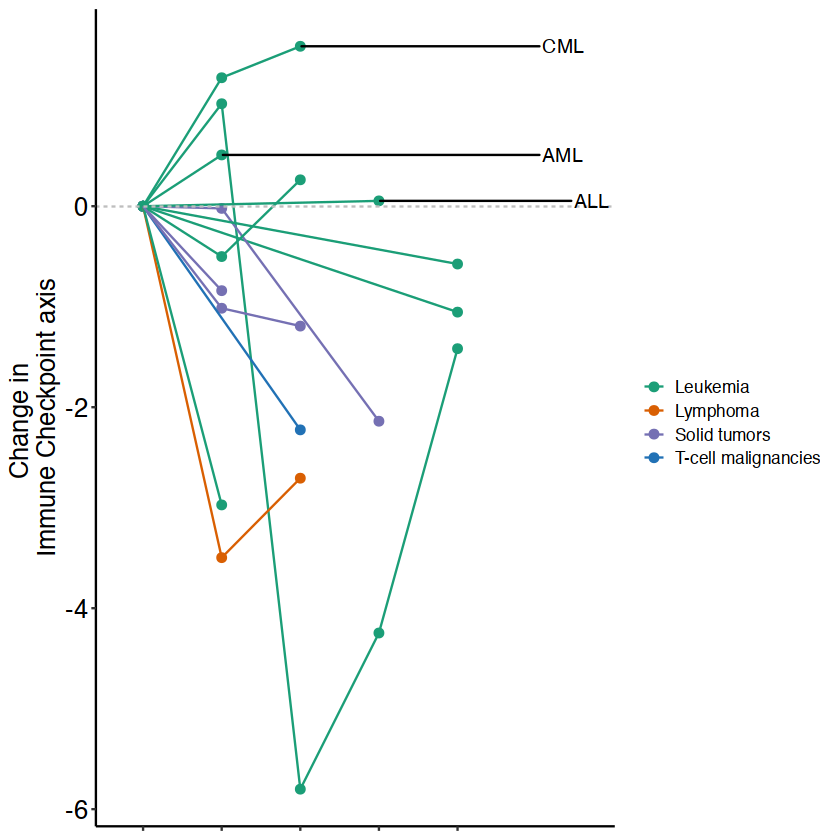

In [80]:
p_dim1_

In [81]:
# get the last timepoint for each patient
last_timepoint <- diff_Dim2 %>%
    group_by(Patient) %>%
    filter(cycle == max(cycle)) %>% 
    ungroup()
last_timepoint$cycleno <- as.numeric(gsub("X0", "", last_timepoint$cycle))

p_dim2_ <- p_dim2 + geom_text_repel(
    data = last_timepoint[ last_timepoint$Patient %in% rownames(mytab_dim2)[mytab_dim2$`TRUE` == 0], ],
    aes(label = Disease_type),
    hjust = "left",
    direction = "y",
    nudge_x = 4 - last_timepoint$cycleno,
    size = 4,
    xlim = c(6, NA)
    #  segment.wid = NA,
)


Warning message in x + params$x:
“longer object length is not a multiple of shorter object length”


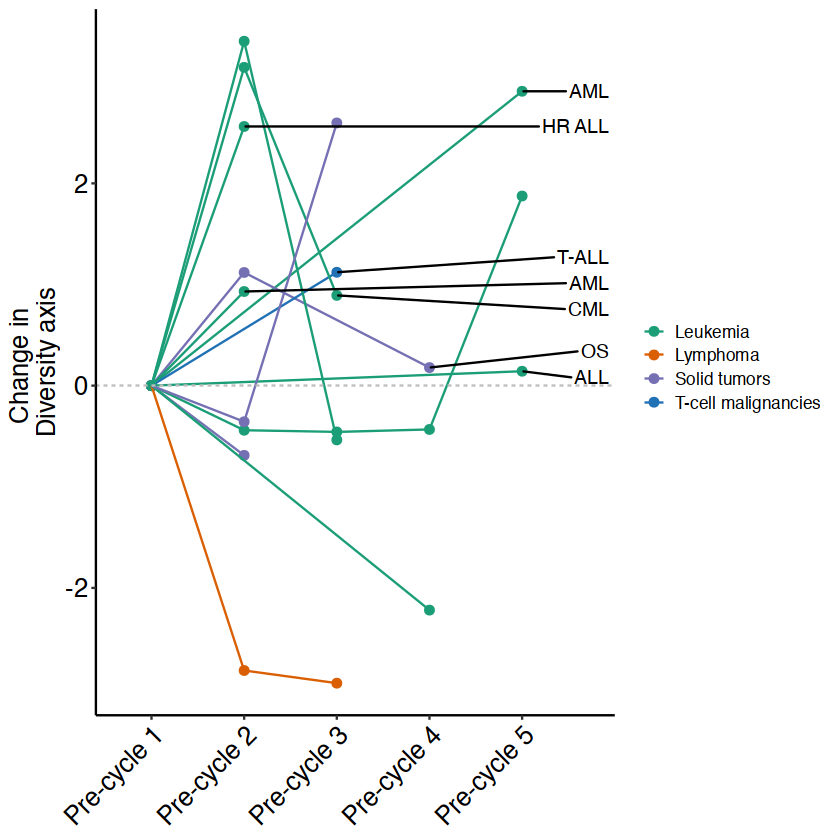

In [82]:
p_dim2_ #+ facet_wrap(~cancergroup)

In [83]:
pdf(paste0(plotpath, "diff_dim1_2.pdf"), width = 5, height = 6)
(p_dim1_ + theme(legend.position = "none") )/ (p_dim2_ + theme(legend.position = "none") )
dev.off()

Warning message in x + params$x:
“longer object length is not a multiple of shorter object length”


pdf 
  2

In [84]:
pdf(paste0(plotpath, "diff_dim1_lgd.pdf"), width = 5, height = 5)
grid.draw(get_legend(p_dim1)) 
dev.off()

pdf 
  2

In [85]:
diff_dim1_dim2 <- merge(diff_Dim1, diff_Dim2[,c("sample_id", "Difference")], by = "sample_id")

In [86]:
diff_dim1_dim2

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cyclenum,prepost,Dim1,Dim2,dist,quantreg,meddist_n,alpha,Difference.x,Difference.y
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,1,Pre-therapy,0.74133606,0.08700802,NA,0.41014023,0.5434345,0.4,0.00000000,0.0000000
CHP_348_02,CHP_348,X02,3.2,437.50,18,OS,3.2,2379,61,...,2,Post-therapy,-0.09898924,-0.60229439,1.0868691,0.41014023,0.5434345,0.4,-0.84032529,-0.6893024
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,1,Pre-therapy,1.71840504,-0.55029920,NA,-1.38092546,NA,0.4,0.00000000,0.0000000
CHP_353_05,CHP_353,X05,14.6,1180.35,6,AML,14.6,2092,513,...,5,Post-therapy,0.66460147,2.36014917,NA,-1.38092546,NA,0.4,-1.05380357,2.9104484
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,1,Pre-therapy,0.65135194,0.32219737,NA,0.01577622,0.5205460,0.4,0.00000000,0.0000000
CHP_357_02,CHP_357,X02,2.1,351.48,1,AML,2.1,1043,28,...,2,Post-therapy,1.67113191,-0.11885852,1.1110722,0.01577622,0.5205460,0.4,1.01977997,-0.4410559
CHP_357_03,CHP_357,X03,5.1,415.31,1,AML,5.1,2098,7,...,3,Post-therapy,-5.14942531,-0.13537444,6.8205772,0.01577622,0.5205460,0.4,-5.80077725,-0.4575718
CHP_357_04,CHP_357,X04,2.8,0.00,1,AML,2.8,2059,15,...,4,Post-therapy,-3.59532732,-0.11108480,1.5542878,0.01577622,0.5205460,0.4,-4.24667926,-0.4332822
CHP_357_05,CHP_357,X05,2.9,0.00,1,AML,2.9,611,8,...,5,Post-therapy,-0.76620516,2.19697205,3.6511722,0.01577622,0.5205460,0.4,-1.41755710,1.8747747


In [87]:
p5 <- ggplot(diff_dim1_dim2, aes(x = Difference.x, y = Difference.y, color = cancergroup)) +
    geom_point() +
    # geom_text_repel(aes(label = Relapse), size = 3) +
    geom_line(aes(group = Patient, color = cancergroup)) +
    myplot +
    myaxis +
    theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
    scale_color_manual(values = group_col) +
    geom_hline(yintercept = 0, linetype = "dashed") +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Change in Immune Checkpoint axis", y = "Change in Diversity axis")


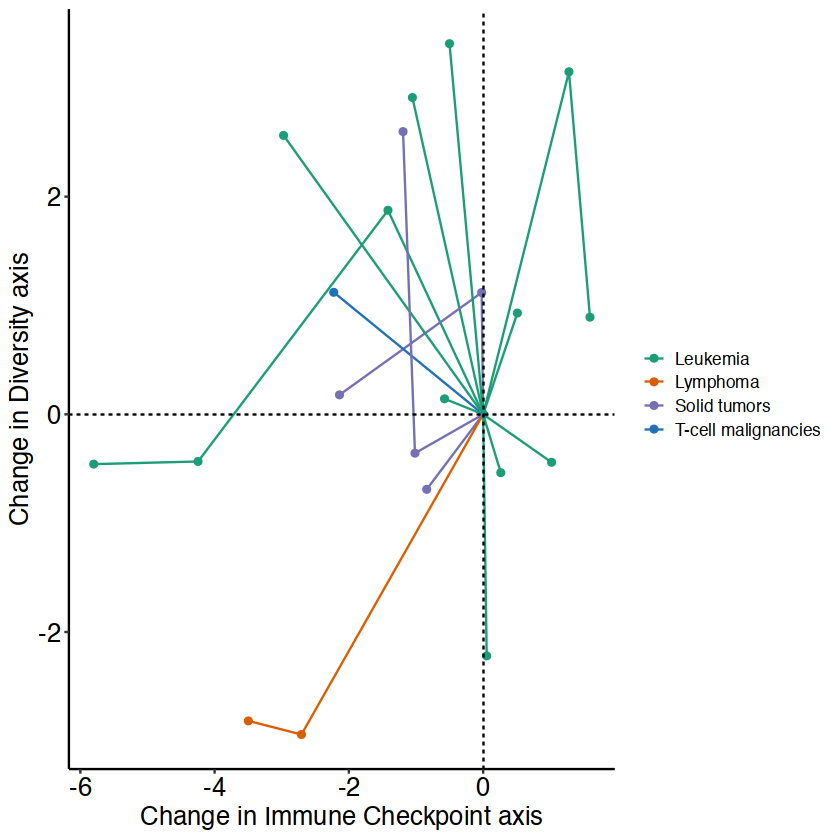

In [88]:
p5

In [89]:
pdf(paste0(plotpath, "spider_dim1_dim2.pdf"), width = 5, height = 5)
p5 + theme(legend.position = "none")
dev.off()

pdf 
  2

In [90]:
ls()

[1] "addjurkat.fx"            "age_pal"                
 [3] "align_plots1"            "allpts"                 
 [5] "allpts_no0"              "calculate_delta.fx"     
 [7] "cfdna_hla_v_j_gliph"     "cohort_col"             
 [9] "cols_flow"               "cols_others"            
[11] "cycle_col"               "datapath"               
[13] "delta_basespiderplot.fx" "df_narm"                
[15] "diff_Dim1"               "diff_dim1_dim2"         
[17] "diff_Dim2"               "dimplot_pt"             
[19] "distances_df"            "gitpath"                
[21] "group_col"               "h4hpath"                
[23] "histdenp"                "histp"                  
[25] "i"                       "last_timepoint"         
[27] "lsm"                     "manifestpath"           
[29] "medians"                 "message_parallel"       
[31] "myaxis"                  "mydiff"                 
[33] "mydist"                  "myfit"                  
[35] "myformula"               "mymat"                  
[37] "mymat_narm"              "mypatients"             
[39] "mypatients_order"        "myplot"                 
[41] "mysample_df"             "mytab_dim1"             
[43] "mytab_dim2"              "p_dim1"                 
[45] "p_dim1_"                 "p_dim2"                 
[47] "p_dim2_"                 "p1"                     
[49] "p2"                      "p3"                     
[51] "p4"                      "p5"                     
[53] "pbmc_hla_v_j_gliph"      "pca"                    
[55] "plotpath"                "pts"                    
[57] "round_and_format"        "safe_mclapply"          
[59] "sampletags_columns"      "text_matrix"            
[61] "tmp"                     "toString_onefle.fx"     
[63] "type_col"

# Impute with missMDA

In [91]:
head(pbmc_hla_v_j_gliph)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,0,0,0,0,0,0,0,0,NA,5
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,43.423,3
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,8.671,5
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,1.775,5
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,NA,4
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,3.065,5


In [92]:
head(mymat)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,0.00,NA,NA,NA,NA,NA,NA,NA,NA,11.878,NA
CHP_323_03,786.24,NA,NA,NA,NA,NA,NA,NA,NA,37.722,43.423
CHP_323_05,979.50,NA,NA,NA,NA,NA,NA,NA,NA,81.753,8.671
CHP_324_05,0.00,NA,NA,NA,NA,NA,NA,NA,NA,129.919,1.775
CHP_328_04,130.82,NA,NA,NA,NA,NA,NA,NA,NA,223.747,NA
CHP_328_05,91.16,NA,NA,NA,NA,NA,NA,NA,NA,87.321,3.065


In [93]:
table(pbmc_hla_v_j_gliph$cancergroup )


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                164                  54                 121                  15 

In [94]:
head(pbmc_hla_v_j_gliph)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,0,0,0,0,0,0,0,0,NA,5
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,43.423,3
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,8.671,5
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,1.775,5
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,NA,4
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,3.065,5


In [95]:
set.seed(123)
res.comp <- imputePCA(mymat, ncp = 5, maxiter = 1000)

In [96]:
res.pca <- PCA(res.comp, quali.sup = NULL, ncp = 5, graph = FALSE) 

In [97]:
res.comp <- res.comp$completeObs

In [98]:
dim(res.comp)

[1] 354  11

In [99]:
dim(pbmc_hla_v_j_gliph)

[1]  354 8831

In [100]:
head(res.comp)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon
CHP_319_05,0.00,13.54575,9.663029,16.44255,5.701024,54.66353,24.63651,14.30055,24.67881,11.878,2.733345
CHP_323_03,786.24,33.24240,-15.837951,29.64994,17.918741,35.15985,19.47117,23.77311,19.75070,37.722,43.423000
CHP_323_05,979.50,19.41790,5.458693,17.43748,6.502780,51.21411,18.71027,13.40403,18.73311,81.753,8.671000
CHP_324_05,0.00,20.52749,9.970892,13.47580,3.720279,52.31436,20.17399,11.51695,20.25597,129.919,1.775000
CHP_328_04,130.82,29.13301,5.918039,13.44616,4.272620,47.25334,15.92697,11.00051,16.07903,223.747,7.888416
CHP_328_05,91.16,18.32906,9.242230,14.91303,4.723876,52.80595,21.46395,12.68138,21.53011,87.321,3.065000


In [101]:
colnames(res.comp) <- paste0(colnames(res.comp), "_imputed")

In [102]:
pbmc_hla_v_j_gliph_rescomp <- cbind(pbmc_hla_v_j_gliph, res.comp[match(pbmc_hla_v_j_gliph$sample_id, rownames(res.comp)),])

In [103]:
readr::write_rds(pbmc_hla_v_j_gliph_rescomp, paste0(datapath, "/int_imputedPCA.rds"))

In [104]:
mypca <- PCA(res.comp, quali.sup = NULL, ncp = 5, graph = FALSE) 

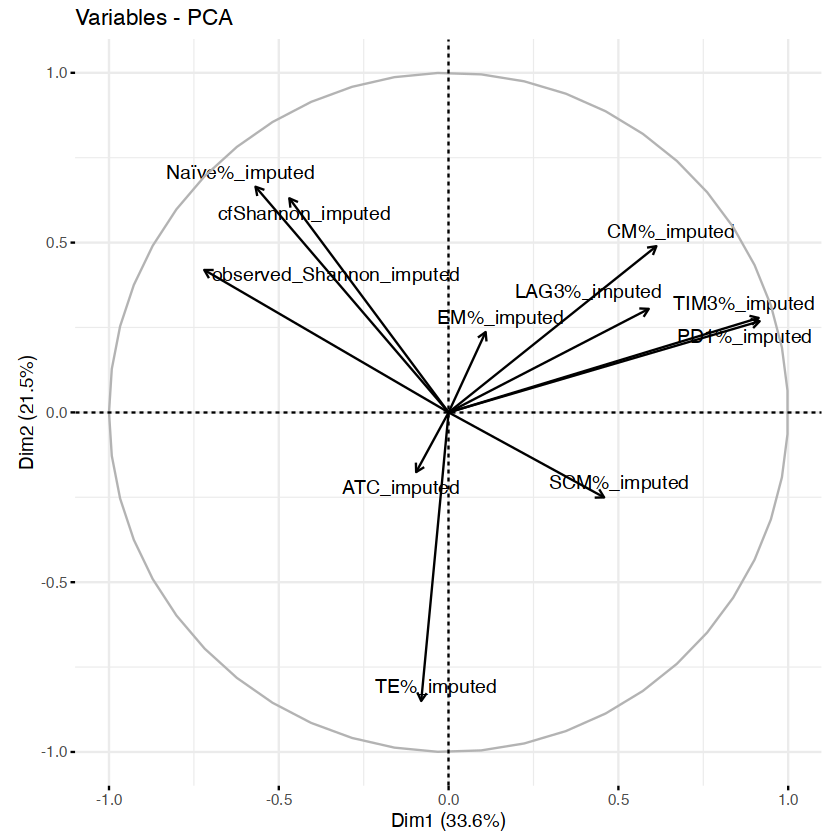

In [105]:
fviz_pca_var(mypca, repel = T)

In [106]:
p1 <- fviz_pca_ind(mypca,
     habillage = as.factor(pbmc_hla_v_j_gliph_rescomp$cancergroup),
    # remove labels
    label = "none",
    repel = F, addEllipses = FALSE, mean.point = FALSE
)

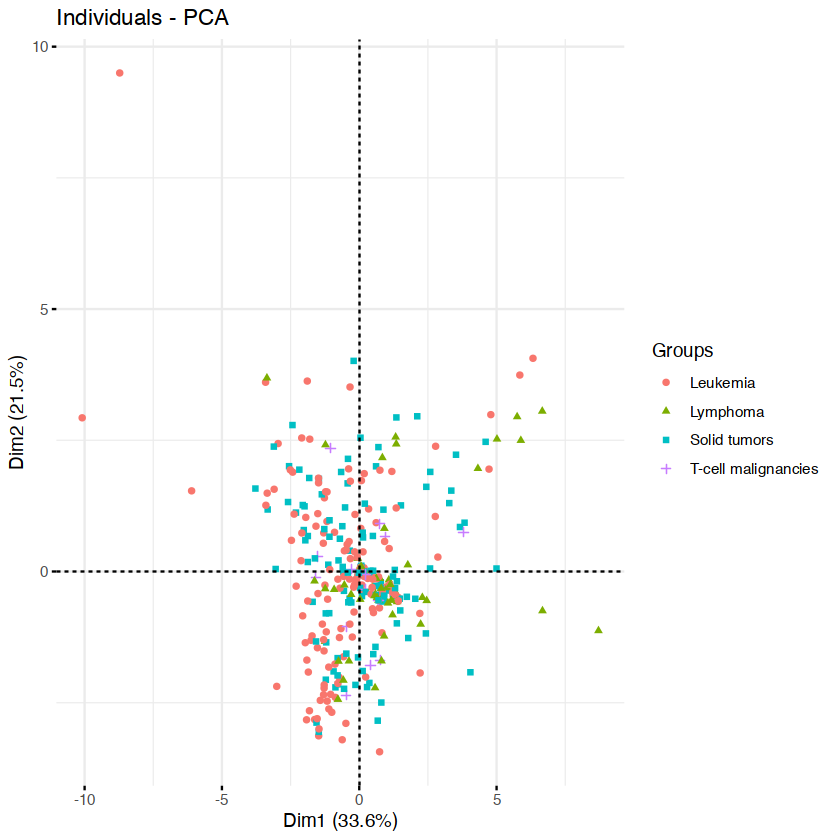

In [107]:
p1

In [108]:
rescomp <- pbmc_hla_v_j_gliph_rescomp#[ !is.na(pbmc_hla_v_j_gliph_rescomp$`CM%_imputed`), ]

In [109]:
head(rescomp)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,Naïve%_imputed,SCM%_imputed,CM%_imputed,EM%_imputed,TE%_imputed,PD1%_imputed,LAG3%_imputed,TIM3%_imputed,observed_Shannon_imputed,cfShannon_imputed
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,13.54575,9.663029,16.44255,5.701024,54.66353,24.63651,14.30055,24.67881,11.878,2.733345
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,33.24240,-15.837951,29.64994,17.918741,35.15985,19.47117,23.77311,19.75070,37.722,43.423000
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,19.41790,5.458693,17.43748,6.502780,51.21411,18.71027,13.40403,18.73311,81.753,8.671000
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,20.52749,9.970892,13.47580,3.720279,52.31436,20.17399,11.51695,20.25597,129.919,1.775000
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,29.13301,5.918039,13.44616,4.272620,47.25334,15.92697,11.00051,16.07903,223.747,7.888416
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,18.32906,9.242230,14.91303,4.723876,52.80595,21.46395,12.68138,21.53011,87.321,3.065000


In [110]:
myx <- res.pca$ind$coord
mydist <- as.matrix(dist(myx[, 1:2])) 

In [111]:
rescomp$Dim1 <- myx[,1][match( rescomp$sample_id, rownames(myx))]
rescomp$Dim2 <- myx[,2][match( rescomp$sample_id, rownames(myx))]

### SPiderplot

In [112]:
diff_Dim1 <- calculate_delta.fx(rescomp, "cycle", "Dim1")
diff_Dim2 <- calculate_delta.fx(rescomp, "cycle", "Dim2")

In [113]:
diff_dim1_dim2 <- merge(diff_Dim1, diff_Dim2[,c("sample_id", "Difference")], by = "sample_id")

In [114]:
p5 <- ggplot(diff_dim1_dim2, aes(x = Difference.x, y = Difference.y, 
color = as.factor(Relapse) )) +
    geom_point() +
    # geom_text_repel(aes(label = Relapse), size = 3) +
    geom_line(aes(group = Patient, color = as.factor(Relapse)) )+
    myplot +
    myaxis +
    theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
    # scale_color_manual(values = group_col) +
    geom_hline(yintercept = 0, linetype = "dashed") +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Change in Immune Checkpoint axis", y = "Change in Diversity axis")


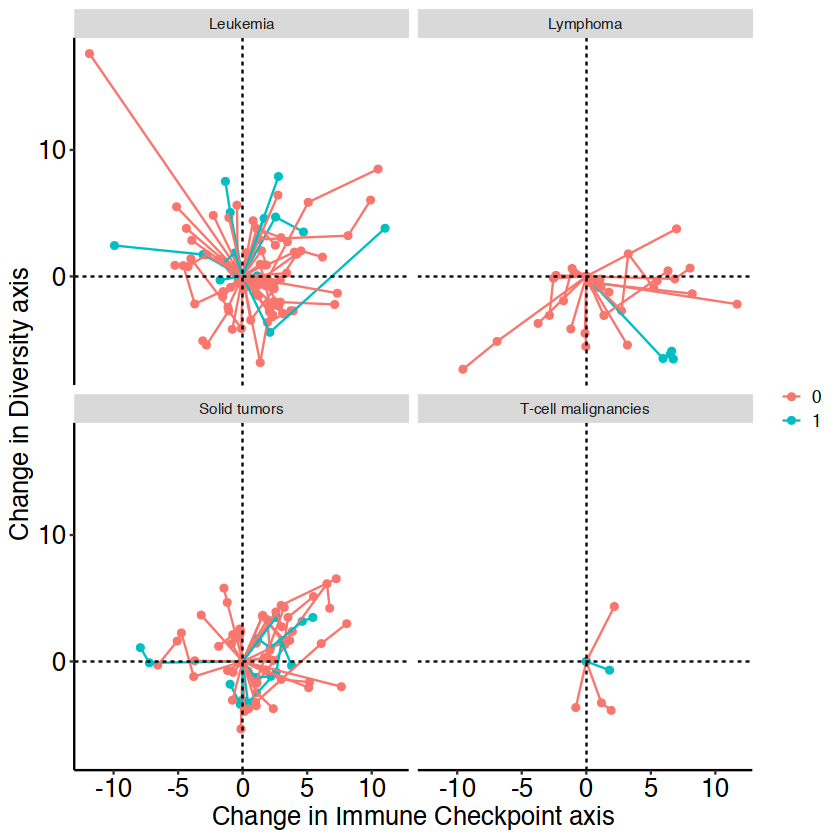

In [115]:
p5 + facet_wrap(~cancergroup)

### Get distances

In [116]:
myx <- res.pca$ind$coord
mydist <- as.matrix(dist(myx[, 1:2]))

In [117]:
head(myx)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
CHP_319_05,2.1326016,-0.7096627,0.1796151,-0.65282150,0.22993956
CHP_323_03,-0.3753029,5.7366412,6.0158690,-0.08515306,1.01506955
CHP_323_05,0.6746451,-0.0267239,1.0404103,0.74278065,0.33937710
CHP_324_05,0.8820754,-0.7212642,-0.6066990,-0.52811014,-0.05091541
CHP_328_04,-0.4869111,0.3541052,-0.2222884,-0.34009224,-0.13206303
CHP_328_05,1.2508161,-0.5969133,-0.1525691,-0.45504356,0.08203159


In [118]:
sample_df <- pbmc_hla_v_j_gliph %>%
    group_by(Patient) %>%
    # order cyclenum
    arrange(cyclenum) %>%
    ungroup()
pts <- names(which(table(sample_df$Patient) > 1))


In [119]:
head(sample_df)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,0,0,0,0,NA,1
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,0,NA,1
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,0,0,0,0,2.874,1
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,0,0,0,0,1.890,1
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,0,0,0,0,NA,1
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,0,0,0,0,0,0,0,0,NA,1


In [120]:
sample_df$Dim1 <- myx[,1][match( sample_df$sample_id, rownames(myx))]
sample_df$Dim2 <- myx[,2][match( sample_df$sample_id, rownames(myx))]
# sample_df$dist <- NA

In [121]:
sample_df$dist <- NA

In [122]:
for (i in pts) {
    tmp <- sample_df[sample_df$Patient == i, ]

    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    sample_df$dist[sample_df$Patient == i] <- tmp$dist

}


In [123]:
sample_df[ sample_df$Patient == "CHP_324",]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_324_04,CHP_324,X04,0,0,12,T-ALL,0,0,NA,...,NA,NA,NA,NA,NA,1.000,4,1.0359544,-0.8628254,NA
CHP_324_05,CHP_324,X05,0,0,12,T-ALL,0,0,NA,...,0,0,0,0,0,1.775,5,0.8820754,-0.7212642,0.2090893


In [124]:
allpts <- as.data.frame(table(sample_df$Patient), stringsAsFactors = F)
# sample_df$dist[sample_df$dist == 0] <- NA

allpts$sumdist <- NA
allpts$meddist <- NA
allpts$samplecount <- NA

for (i in 1:nrow(allpts)) {
    tmp <- as.data.frame(sample_df[sample_df$Patient == allpts$Var1[i], ])
    # allpts$sumdist[i] <- sum(tmp[tmp$dist != 0, "dist"], na.rm = T)
    allpts$meddist[i] <- median(tmp[tmp$dist != 0, "dist"], na.rm = T)
    # count number of samples for meddist
    allpts$samplecount[i] <- nrow(tmp[!is.na(tmp$dist), ]) + 1
}
# allpts$sumdist_n <- allpts$sumdist / allpts$samplecount
allpts$meddist_n <- allpts$meddist / allpts$samplecount
# allpts_no0 <- allpts[allpts$sumdist_n > 0, ]
allpts_no0 <- allpts[allpts$Freq > 1, ]

mysample_df <- sample_df[sample_df$Patient %in% allpts_no0$Var1, ]
mypatients <- mysample_df[!duplicated(mysample_df$Patient), ]

mypatients$meddist_n <- allpts_no0$meddist_n[match(mypatients$Patient, allpts_no0$Var1)]
mypatients$meddist <- allpts_no0$meddist[match(mypatients$Patient, allpts_no0$Var1)]


In [125]:
sample_df[ sample_df$Patient == "CHP_418",]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%GE,S%G,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_418_01,CHP_418,X01,0.0,18.48,2,NB,0.0,0,NA,...,0,0,0,0,0,1.000,1,1.1631278,-0.8852423,NA
CHP_418_02,CHP_418,X02,1.4,0.00,2,NB,1.4,581,45,...,0,0,0,0,0,2.696,2,0.1890619,-2.6841995,2.0457398
CHP_418_03,CHP_418,X03,0.5,0.00,2,NB,0.5,4018,34,...,NA,NA,NA,NA,NA,NA,3,3.7556831,2.5930923,6.3695051
CHP_418_04,CHP_418,X04,0.6,0.00,2,NB,0.6,2295,4,...,NA,NA,NA,NA,NA,NA,4,0.9758509,-4.2703313,7.4050017
CHP_418_05,CHP_418,X05,1.2,NA,2,NB,1.2,2397,9,...,NA,NA,NA,NA,NA,NA,5,1.1393917,-3.9364870,0.3717494


In [216]:
median.cohorts.fx

function (df, myvar, mygroups) 
{
    df.mygroups <- cbind(unique(df[[mygroups]]), NA)
    colnames(df.mygroups) <- c("group", "median")
    df.mygroups <- as.data.frame(df.mygroups)
    df.mygroups$median <- as.numeric(df.mygroups$median)
    for (i in 1:nrow(df.mygroups)) {
        df.mygroups$median[i] <- median(df[[myvar]][df[[mygroups]] == 
            df.mygroups$group[i]])
    }
    df.mygroups <- df.mygroups[order(df.mygroups$median, decreasing = F), 
        ]
    return(df.mygroups)
}

In [218]:
table(mypatients$Disease_type)


  ALCL    ALL    AML   ARMS     BL    BLL    CML  DLBCL   ERMS    EWS     HB 
     1     21      9      1      3      2      2      2      5      6      3 
    HD HR ALL     NB     OS  PMBCL    RMS SR ALL  T-ALL  WILMS 
     5      9      2      9      2      1      3      4      3 

### S plot

Add placeholders

In [338]:
# mypatients <- mypatients[ !grepl("EMPTY", mypatients$Disease_type), ]

In [339]:
mypatients <- rbind(NA, NA, NA, mypatients)
mypatients[1, "Disease_type"] <- "EMPTY1"
mypatients[2, "Disease_type"] <- "EMPTY2"
mypatients[3, "Disease_type"] <- "EMPTY3"
mypatients[1, "meddist_n"] <- -1
mypatients[2, "meddist_n"] <- -1
mypatients[3, "meddist_n"] <- -1
mypatients[1, "cancergroup"] <- "Lymphoma"
mypatients[2, "cancergroup"] <- "Solid tumors"
mypatients[3, "cancergroup"] <- "T-cell malignancies"

In [351]:
mymed <- median.cohorts.fx(mypatients, "meddist_n", "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- mypatients$cancergroup[match(mymed$group, mypatients$Disease_type)]

In [352]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [353]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
19,SR ALL,0.1042772,Leukemia
4,ALL,0.6666049,Leukemia
8,AML,1.3643697,Leukemia
11,HR ALL,1.9412409,Leukemia
6,CML,2.4660150,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
9,HD,0.4883533,Lymphoma
17,BLL,0.6429431,Lymphoma
20,PMBCL,0.9349142,Lymphoma


Sort df

In [354]:
sorted.df.lst <- sort.df.fx(mypatients, mymed, "meddist_n", "Disease_type")

Color dummy entries white

In [355]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [356]:
# mymed$color_crossbar <- NA

# mymed$color_crossbar[mymed$group == "EMPTY1"] <- "white"
# mymed$color_crossbar[mymed$group == "EMPTY2"] <- "white"
# mymed$color_crossbar[mymed$group == "EMPTY3"] <- "white"

# mymed$color_crossbar[is.na(mymed$color_crossbar)] <- "black"

In [357]:
Sp <- Splot.fx(sorted.df.lst, "meddist_n", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_crossbar()`).”


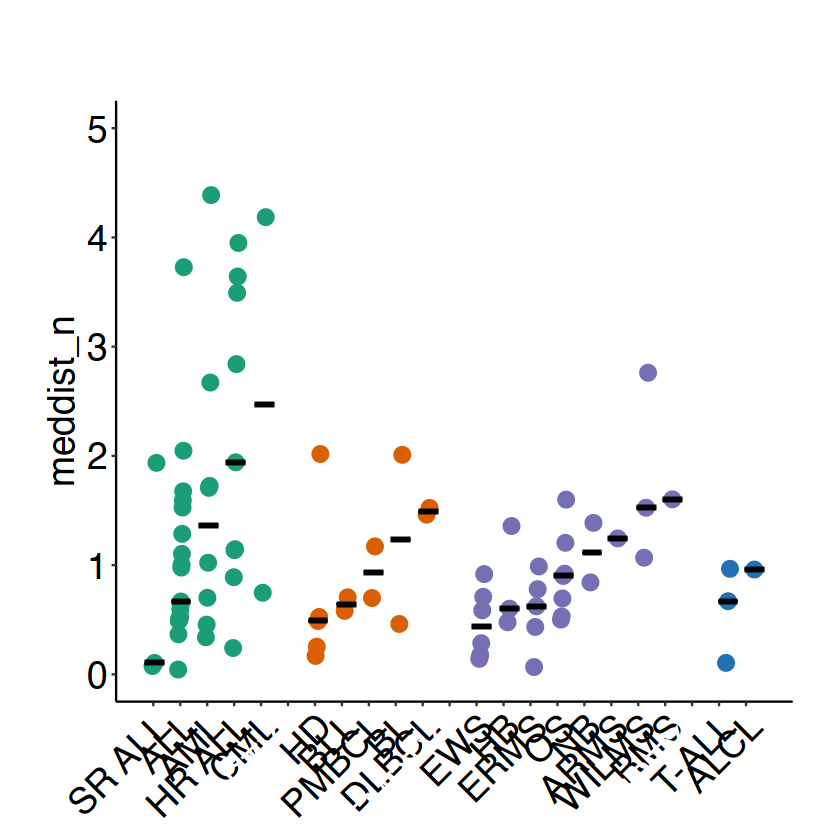

In [359]:
Sp + ylim(c(0, 5))

In [361]:
pdf(paste0(plotpath, "TIS.pdf"), width = 15, height = 5)
Sp + ylab("Temporal Immunogenomic\nScore (TIS)") + ylim(c(0, 5))
dev.off()

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


Warning message:
“Removed 3 rows containing missing values (`geom_crossbar()`).”


pdf 
  2

In [127]:
sample_df$meddist_n <- mypatients$meddist_n[match(sample_df$Patient, mypatients$Patient)]

In [128]:
mypatients[is.na(mypatients$meddist_n), ]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist,meddist_n,meddist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,0,0,4.170,1,-1.3514412,-3.6525629,NA,NA,NA
CHP_371_01,CHP_371,X01,2.1,333.20,15,BL,2.1,1014,37,...,0,0,0,3.431,1,2.0209726,3.4299647,NA,NA,NA
CHP_387_01,CHP_387,X01,0.8,288.99,13,T-ALL,0.8,2414,209,...,0,0,0,1.021,1,-0.7076881,-3.2903641,NA,NA,NA
CHP_397_01,CHP_397,X01,1.6,124.80,2,ALL,1.6,2400,0,...,0,0,0,1.000,1,-1.1710548,-3.0825977,NA,NA,NA
CHP_417_01,CHP_417,X01,0.0,159.46,16,ALL,0.0,0,NA,...,0,0,0,NA,1,2.1434193,-0.8035836,NA,NA,NA
CHP_351_03,CHP_351,X03,2.4,0.00,7,OS,2.4,1332,15,...,0,0,0,2.547,3,1.0411115,3.3315067,NA,NA,NA


In [129]:
sample_df[ sample_df$Patient == "CHP_353",]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,S%G,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist,meddist_n
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,0,0,0,4.170,1,-1.351441,-3.652563,NA,NA
CHP_353_03,CHP_353,X03,46.3,1213.70,6,AML,46.3,2419,153,...,0,0,0,0,NA,3,-2.313654,1.403366,NA,NA
CHP_353_05,CHP_353,X05,14.6,1180.35,6,AML,14.6,2092,513,...,0,0,0,0,29.077,5,-2.688958,3.860059,NA,NA


In [130]:
summary(mypatients$meddist_n)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.04376 0.51011 0.90069 1.14603 1.52412 4.38711       6 

In [131]:
head(sample_df)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,S%G,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist,meddist_n
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,NA,1,-3.8906054,2.7278633,NA,NA
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,NA,1,-0.8626402,-2.3482363,NA,1.2862241
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,2.874,1,-0.8623382,-0.6462504,NA,0.9006916
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,1.890,1,-0.9518104,-4.8359061,NA,4.1855440
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,NA,1,-2.5951609,-1.0673703,NA,0.4766453
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,0,0,0,0,NA,1,-1.4952107,-3.8530336,NA,NA


In [132]:
# morethantwo <- names(which(table(sample_df$Patient) >2))

In [133]:
# sample_df$prepost <- NA
# sample_df$prepost[ sample_df$cycle == "X01"] <- "Pre"
# sample_df$prepost[ sample_df$cycle != "X01"] <- "Post"

In [134]:
# sample_df$imputed <- NA
# sample_df$imputed[ sample_df$sample_id %in% rownames(mymat_narm)] <- "Real"
# sample_df$imputed[ !sample_df$sample_id %in% rownames(mymat_narm)] <- "Imputed"

In [135]:
# ggplot(data = sample_df, aes(x = Dim1, y = Dim2,  shape = as.factor(Relapse)))  + 
# geom_point(aes(color = cancergroup), alpha = 1, size = 3) + 
# # geom_text(data = df_narm[df_narm$Patient %in% c( "CHP_418"),], aes(label = Patient), size = 3, nudge_x = 0.1, nudge_y = 0.1) +
#  geom_path(data = sample_df[sample_df$Patient %in% c( "CHP_353"),], aes(group = Patient), #color = c("red", "black"),
#  arrow = arrow(length=unit(0.30,"cm"), ends="last", type = "closed")) +
# myplot + myaxis + theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
# scale_color_manual(values =  group_col) + geom_hline(yintercept = 0,  linetype = "dashed") +
# geom_vline(xintercept = 0,  linetype = "dashed") + ggtitle(expression(underline("PCA"))) 

In [136]:
# head(sample_df)

In [137]:
# ggplot(mypatients, aes(x = Age, y = meddist_n, color = Disease_type)) +
#   geom_point() +
#     myplot +
#     myaxis

In [138]:
tapply(mypatients$meddist_n, mypatients$Relapse, summary, na.rm = T)

$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.04376 0.50131 0.89476 1.02947 1.40542 3.72740       5 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.1683  0.5579  0.9659  1.7055  2.7559  4.3871       1 


In [139]:
wilcox.test(mypatients$meddist_n, mypatients$Relapse)


	Wilcoxon rank sum test with continuity correction

data:  mypatients$meddist_n and mypatients$Relapse
W = 7275, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [201]:
rms::lrm(Relapse ~ meddist_n, data = mypatients, maxit = 100)

Frequencies of Missing Values Due to Each Variable
  Relapse meddist_n 
        0         6 

Logistic Regression Model

rms::lrm(formula = Relapse ~ meddist_n, data = mypatients, maxit = 100)


                      Model Likelihood     Discrimination    Rank Discrim.    
                            Ratio Test            Indexes          Indexes    
Obs            87    LR chi2      5.20     R2       0.096    C       0.597    
 0             72    d.f.            1     R2(1,87) 0.047    Dxy     0.194    
 1             15    Pr(> chi2) 0.0226    R2(1,37.2)0.107    gamma   0.194    
max |deriv| 1e-10                          Brier    0.130    tau-a   0.056    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept -2.3539 0.4805 -4.90  <0.0001 
meddist_n  0.5945 0.2585  2.30  0.0214  


In [202]:
rms::lrm(Relapse ~ meddist_n*cancergroup, data = mypatients, maxit = 100)

Frequencies of Missing Values Due to Each Variable
    Relapse   meddist_n cancergroup 
          0           6           0 

Logistic Regression Model

rms::lrm(formula = Relapse ~ meddist_n * cancergroup, data = mypatients, 
    maxit = 100)


                      Model Likelihood     Discrimination    Rank Discrim.    
                            Ratio Test            Indexes          Indexes    
Obs            87    LR chi2     20.90     R2       0.355    C       0.801    
 0             72    d.f.            7     R2(7,87) 0.148    Dxy     0.602    
 1             15    Pr(> chi2) 0.0039    R2(7,37.2)0.312    gamma   0.602    
max |deriv| 5e-05                          Brier    0.104    tau-a   0.174    

                                            Coef       S.E.       Wald Z
Intercept                                      -2.9850     0.8255 -3.62 
meddist_n                                       0.8758     0.3375  2.59 
cancergroup=Lymphoma                           45.1233   248

In [203]:
lrmodel <- glm(Relapse ~ meddist_n, data = mypatients, family = "binomial")
mysum <- summary(lrmodel)
mysum
exp(confint.default(lrmodel, level = 0.95))
exp(mysum$coefficients[2, "Estimate"])


Call:
glm(formula = Relapse ~ meddist_n, family = "binomial", data = mypatients)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1195  -0.5934  -0.5143  -0.4520   2.1696  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.3539     0.4805  -4.898 9.67e-07 ***
meddist_n     0.5945     0.2585   2.300   0.0214 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 79.987  on 86  degrees of freedom
Residual deviance: 74.789  on 85  degrees of freedom
  (6 observations deleted due to missingness)
AIC: 78.789

Number of Fisher Scoring iterations: 4


,2.5 %,97.5 %
(Intercept),0.03704161,0.2436541
meddist_n,1.09189474,3.0074916


[1] 1.812144

In [142]:
head(sample_df)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,S%G,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist,meddist_n
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,NA,1,-3.8906054,2.7278633,NA,NA
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,NA,1,-0.8626402,-2.3482363,NA,1.2862241
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,2.874,1,-0.8623382,-0.6462504,NA,0.9006916
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,1.890,1,-0.9518104,-4.8359061,NA,4.1855440
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,NA,1,-2.5951609,-1.0673703,NA,0.4766453
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,0,0,0,0,NA,1,-1.4952107,-3.8530336,NA,NA


In [143]:
mypatients$Patient[ mypatients$Relapse == 1]

[1] "CHP_349" "CHP_353" "CHP_364" "CHP_368" "CHP_413" "CHP_418" "CHP_338"
 [8] "CHP_342" "CHP_356" "CHP_376" "CHP_380" "CHP_390" "CHP_395" "CHP_402"
[15] "CHP_359" "CHP_411"

In [144]:
head(mypatients)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%YE,%G,%E,cfShannon,cyclenum,Dim1,Dim2,dist,meddist_n,meddist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,NA,1,-0.8626402,-2.3482363,NA,1.2862241,6.431120
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,2.874,1,-0.8623382,-0.6462504,NA,0.9006916,1.801383
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,1.890,1,-0.9518104,-4.8359061,NA,4.1855440,8.371088
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,NA,1,-2.5951609,-1.0673703,NA,0.4766453,2.383226
CHP_353_01,CHP_353,X01,0.9,344.00,6,AML,0.9,2376,19,...,0,0,0,4.170,1,-1.3514412,-3.6525629,NA,NA,NA
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,0,0,6.906,1,-1.0641749,-0.5239035,NA,1.0213805,5.106902


In [176]:
dimplot_pt <- function(df, pt,  myalpha) {
   p1 <- ggplot(data = df, aes(x = Dim1, y = Dim2 )) +
      geom_point(aes(color = cancergroup, alpha = eval(parse(text = myalpha))), size = 3) +
      geom_path(
         data = df[df$Patient == pt, ], aes(group = Patient), # color = c("red", "black"),
         arrow = arrow(length = unit(0.30, "cm"), ends = "last", type = "closed")
      ) +
      myplot +
      myaxis +
      theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
      scale_color_manual(values = group_col) +
      geom_hline(yintercept = 0, linetype = "dashed") +
      geom_vline(xintercept = 0, linetype = "dashed") 

   return(p1)
}


In [195]:
for (i in mypatients$Patient[mypatients$Relapse == 1]) {
    sample_df$alpha <- NA
    sample_df$alpha[sample_df$Patient == i] <- 1
    sample_df$alpha[sample_df$Patient != i] <- 0.1
    myp <- dimplot_pt(sample_df, i, "alpha") +  scale_alpha_continuous(range = c(0.3, 1)) +
        ggtitle(paste0(
            i, " Relapsed ", mypatients$Disease_type[mypatients$Patient == i], "\n",
            "Score: ", mypatients$meddist_n[mypatients$Patient == i]
        )) + labs(x = "Immune Checkpoint axis\n(PC1 = 33.6%)", y = "Diversity axis\n(PC2 = 21.5%)")
    pdf(paste0(plotpath, "PCAplot_imputed_", i, "relapsed.pdf"))
    print(myp + theme(legend.position = "none") )
    dev.off()
}


In [196]:
for (i in mypatients$Patient[mypatients$Relapse == 0]) {
    sample_df$alpha <- NA
    sample_df$alpha[sample_df$Patient == i] <- 1
    sample_df$alpha[sample_df$Patient != i] <- 0.1
    myp <- dimplot_pt(sample_df, i,  "alpha") +     scale_alpha_continuous(range = c(0.3, 1)) +
        ggtitle(paste0(
            i, " In remission ", mypatients$Disease_type[mypatients$Patient == i], "\n",
            "Score: ", mypatients$meddist_n[mypatients$Patient == i]
        )) + labs(x = "Immune Checkpoint axis\n(PC1 = 33.6%)", y = "Diversity axis\n(PC2 = 21.5%)")
    pdf(paste0(plotpath, "PCAplot_imputed_", i, "remission.pdf"))
    print(myp + theme(legend.position = "none"))
    dev.off()
}


In [ ]:

# pdf(paste0(plotpath, "pca_lgd.pdf"), width = 3, height = 6)
# grid.draw(get_legend(myplot + theme(legend.position = "bottom") + guides(shape = guide_legend(ncol = 2))))
# dev.off()

# Old

In [ ]:
pacman::p_load(missForest)

In [ ]:
missforest_mymat <- missForest(mymat, maxiter = 100, ntree = 10)

In [ ]:
p1 <- fviz_pca_ind(prcomp(missforest_mymat$ximp, center = TRUE, scale. = TRUE),
     habillage = as.factor(pbmc_hla_v_j_gliph$cancergroup),
    # remove labels
    label = "none",
    repel = F, addEllipses = FALSE, mean.point = FALSE
)

In [ ]:
p1

In [ ]:
head(missforest_mymat)

In [ ]:
head(mymat)

In [ ]:
colnames(mymat) <- gsub("%", "_p", colnames(mymat))

In [ ]:
colnames(pbmc_hla_v_j_gliph) <- gsub("%", "_p", colnames(pbmc_hla_v_j_gliph))

In [ ]:
# ipc_r <- prcomp( formula( paste("~", paste(mycols[!grepl("TIM3", mycols)]) ) ),
# data = sample_df)

In [ ]:
f1 <- as.formula( paste("~", paste(colnames(mymat), collapse = "+") ) )

In [ ]:
f1

In [ ]:
ptrans <- Hmisc::transcan( f1, 
imputed=TRUE , transformed =TRUE , data= mymat , pl= FALSE , pr= FALSE, iter.max = 100)

In [ ]:
trans <- ptrans$transformed

In [ ]:
head(trans)

In [ ]:
imp <- Hmisc::impute(ptrans , data= mymat, list.out= TRUE)

In [ ]:
names(imp)

In [ ]:
NAvars <- all.vars( as.formula( paste("~", paste(names(imp), collapse = "+") ) ))

In [ ]:
NAvars

In [ ]:
imp_pbmc_hla_v_j_gliph <- pbmc_hla_v_j_gliph

In [ ]:
for(x in NAvars ) imp_pbmc_hla_v_j_gliph[[x]] <- imp[[x]]

In [ ]:
table(imp_pbmc_hla_v_j_gliph$Relapse)

In [ ]:
head(imp_pbmc_hla_v_j_gliph)

In [ ]:
myf <- as.formula( paste("Relapse ~", paste( colnames(mymat), collapse = "+") ) )

In [ ]:
head(imp_pbmc_hla_v_j_gliph)

In [ ]:
trans_fit <- lrm(Relapse ~ trans, data = imp_pbmc_hla_v_j_gliph)

In [ ]:
trans_fit

In [ ]:
myf <- as.formula( paste("Relapse ~", paste( colnames(mymat), collapse = "+") ) )

In [ ]:
raw_fit <- lrm( myf, data = imp_pbmc_hla_v_j_gliph ) 

In [ ]:
AIC(trans_fit)
AIC(raw_fit)

In [ ]:
pca_raw <- prcomp( imp_pbmc_hla_v_j_gliph[, colnames(mymat)])$x[,1:5]

In [ ]:
fviz_pca_ind(prcomp( trans[, colnames(mymat)]),
     col.ind = as.vector(imp_pbmc_hla_v_j_gliph$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE, mean.point = FALSE
)

In [ ]:
pca_trans <- prcomp( trans[, colnames(mymat)])$x[,1:5]

In [ ]:
head(pca_trans)

In [ ]:
pcaraw_fit <- lrm( Relapse ~ pca_raw, data = imp_pbmc_hla_v_j_gliph ) 
pcatrans_fit <- lrm(Relapse ~ pca_trans, data = imp_pbmc_hla_v_j_gliph )

In [ ]:
AIC(pcaraw_fit)
AIC(pcatrans_fit)

# Backup

In [ ]:
mymat <- pbmc_hla_v_j_gliph[, c(66,200:270)]
mymat <- cbind(mymat, pbmc_hla_v_j_gliph[,c('ATC', 'Naïve%','SCM%','CM%','EM%','TE%','PD1%','LAG3%','TIM3%')])
# mymat <- pbmc_hla_v_j_gliph[,c('ATC', 'Naïve%','SCM%','CM%','EM%','TE%','PD1%','LAG3%','TIM3%')]
rownames(mymat) <- pbmc_hla_v_j_gliph$sample_id

In [ ]:
head(mymat, 10)

In [ ]:
# remove rows with all NAs
mymat <- mymat[ rowSums(is.na(mymat)) != ncol(mymat), ]
# rmeove those with only 0s and NAs
mymat <- mymat[ rowSums(mymat, na.rm = TRUE) != 0, ]

In [ ]:
# sample_df <- as.data.frame(sample_df)
rownames(pbmc_hla_v_j_gliph) <- pbmc_hla_v_j_gliph$sample_id

In [ ]:
pbmc_hla_v_j_gliph <- pbmc_hla_v_j_gliph[ rownames(mymat), ]

In [ ]:
dim(pbmc_hla_v_j_gliph)

In [ ]:
dim(mymat)

In [ ]:
pbmc_hla_v_j_gliph <- pbmc_hla_v_j_gliph[ rownames(mymat), ]

In [ ]:
pbmc_hla_v_j_gliph$cyclenum <- as.numeric(gsub("X0", "", pbmc_hla_v_j_gliph$cycle))

# PCA

In [ ]:
mymat_narm <- mymat[ rowSums(is.na(mymat)) == 0, ]
pbmc_hla_v_j_gliph_narm <- pbmc_hla_v_j_gliph[ rownames(mymat_narm), ]

In [ ]:
head(pbmc_hla_v_j_gliph_narm)

In [ ]:
myvars <- sort( Rfast::colVars(mymat_narm) , decreasing = TRUE)

In [ ]:
mymat_narm <- mymat_narm[ , names(myvars)[ myvars > 0]]

In [ ]:
dim(mymat_narm)
dim(mymat)


In [ ]:
#PCA
pca <- prcomp(mymat_narm, center = TRUE, scale. = TRUE)

In [ ]:
# plot PCA with factoextra
viz_pca <- fviz_pca_ind(pca,
    col.ind = as.vector(pbmc_hla_v_j_gliph_narm$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE
)

In [ ]:
viz_pca# + coord_cartesian(xlim = c(-5, 5), ylim = c(-5, 5) )

In [ ]:
dim(mymat_narm)

In [ ]:
sum( summary(pca)$importance[2,1:5] )

In [ ]:
# scree plot
fviz_eig(pca)

In [ ]:
myx <- pca$x

In [ ]:
mydist <- as.matrix(dist(myx[,1:5]))

In [ ]:
head(mydist)

In [ ]:
# pbmc_hla_v_j_gliph_narm$cyclenum <- as.numeric(gsub("X0", "", pbmc_hla_v_j_gliph_narm$cycle))

In [ ]:
sample_df_narm <- pbmc_hla_v_j_gliph_narm %>% group_by(Patient) %>% 
# order cyclenum
arrange(cyclenum) %>%
ungroup()

In [ ]:
pts <- names(which(table(sample_df_narm$Patient) > 1 ))

In [ ]:
sample_df_narm$dist <- NA

In [ ]:
sample_df_narm <- pbmc_hla_v_j_gliph_narm

In [ ]:
for (i in pts) {
    tmp <- sample_df_narm[sample_df_narm$Patient == i, ]
    # tmp <- tmp[ order(tmp$cyclenum, decreasing = F), ]
    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    sample_df_narm$dist[sample_df_narm$Patient == i] <- tmp$dist
}


In [ ]:
# sample_df_narm$dist[is.na(sample_df_narm$dist)] <- 0

In [ ]:
head(sample_df_narm)

In [ ]:
allpts <- as.data.frame(table(sample_df_narm$Patient), stringsAsFactors = F)

In [ ]:
# sample_df_narm$Relapse[is.na(sample_df_narm$Relapse)] <- 0

In [ ]:
# t.test(sample_df_narm$dist[sample_df_narm$dist != 0] ~ sample_df_narm$Relapse[sample_df_narm$dist != 0])

In [ ]:
sample_df_narm[ sample_df_narm$Patient == "CHP_351",]

In [ ]:
sample_df_narm$dist[ sample_df_narm$dist == 0] <- NA

In [ ]:
allpts$sumdist <- NA
for(i in 1:nrow(allpts)){
    tmp <- as.data.frame(sample_df_narm[ sample_df_narm$Patient == allpts$Var1[i],] )
    allpts$sumdist[i] <- sum(tmp[ tmp$dist != 0, "dist"], na.rm = T)
}

In [ ]:
allpts$sumdist_n <- allpts$sumdist / allpts$Freq

In [ ]:
head(allpts, 10)

In [ ]:
allpts_no0 <- allpts[ allpts$sumdist_n > 0,]

In [ ]:
dim(allpts_no0)

In [ ]:
mysample_df <- sample_df_narm[ sample_df_narm$Patient %in% allpts_no0$Var1,]

In [ ]:
dim(mysample_df)

In [ ]:
mypatients <- mysample_df[!duplicated(mysample_df$Patient),]

In [ ]:
dim(mypatients)

In [ ]:
head(mypatients)

In [ ]:
head(allpts_no0)

In [ ]:
mypatients$sumdist_n <- allpts_no0$sumdist_n[ match(mypatients$Patient, allpts_no0$Var1)]
mypatients$sumdist <- allpts_no0$sumdist[ match(mypatients$Patient, allpts_no0$Var1)]

In [ ]:
# tmp$Relapse[ is.na(tmp$Relapse) ] <- 0

In [ ]:
dim(mypatients)

In [ ]:
head(mypatients, 10)

In [ ]:
myfit <- rms::lrm(Relapse ~ sumdist_n, data = mypatients)

In [ ]:
print(myfit)

In [ ]:
anova(myfit)

In [ ]:
mypatients <- mypatients[order(mypatients$sumdist_n),]

In [ ]:
makematrix_4hm <- function(df, var, name) {
    mymat <- df[[var]]
    names(mymat) <- df[["Patient"]]
    mymat <- t(as.matrix(mymat))
    rownames(mymat) <- name
    return(mymat)
}

In [ ]:
mycohort <- makematrix_4hm(mypatients, "Disease_type", "disease")
mysample <- makematrix_4hm(mypatients, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(mypatients, "Relapse", "Relapse")
# myatc <- makematrix_4hm(tmp, "ATC", "ATC")
myage <- makematrix_4hm(mypatients, "Age", "Age")

In [ ]:
age_col <- c("blue", "red")
# atc_col <- c("blue", "red")

In [ ]:
group_col <- c("blue", "red", "green")
names(group_col) <- names(table(mypatients$Relapse))

In [ ]:
# cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
# "brown", "cyan", "magenta", "navy", "maroon", "gray","gold", "darkgreen") 
# names(cohort_col) <- names(table(allpbmcs$Disease_type))

In [ ]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(mypatients$cancergroup))

In [ ]:
age_hm <- Heatmap(myage, col = age_col,  height = unit(1,"cm"))
# atc_hm <- Heatmap(myatc, col = atc_col,  height = unit(1,"cm"))

In [ ]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col, height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col,  height = unit(1,"cm"))

In [ ]:
# length(unique(sample_df_narm$Patient))

In [ ]:
# tail(sample_df_narm[, c("sample_id", "cycle", "dist")])

In [ ]:
# pivot_wider
 
wider_df <- tidyr::pivot_wider(mysample_df, names_from = cycle, values_from = dist, id_cols = Patient) 

wider_df[ wider_df$Patient == "CHP_350",]

In [ ]:
wider_df <- as.data.frame(wider_df)
rownames(wider_df) <- wider_df$Patient
wider_df$Patient <- NULL
wider_df$X01 <- NULL

In [ ]:
head(wider_df)

In [ ]:
hm1 <- Heatmap(t(scale(wider_df)), cluster_columns = F, name = "dists")

In [ ]:
dim(wider_df)

In [ ]:
hm <- Heatmap(t(scale(mypatients$sumdist_n)), cluster_columns = F)

In [ ]:
dim(mypatients)

In [ ]:
hm %v% hm1 %v% sample_hm %v% group_hm %v% age_hm 

In [ ]:
ls()

In [ ]:
rm(tmp, wider_df, pts, myx, mysample, mysample_df, allpts, allpts_no0, distances_df, hm, hm1, i, mydiff, mydist, myfit, mymat_narm, pca, sample_df_narm)